In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kstharunkumar","key":"5c33748f3985a4abba88df14ec4ecf19"}'}

In [ ]:
!pip install -q kaggle

In [ ]:
import os
import shutil

# Create the Kaggle directory
os.makedirs("/root/.kaggle", exist_ok=True)

# Move and rename the uploaded file to 'kaggle.json'
shutil.copy("/content/kaggle.json", "/root/.kaggle/kaggle.json")

# Set file permissions
os.chmod("/root/.kaggle/kaggle.json", 600)

In [ ]:
!kaggle datasets list -s garbage

ref                                                        title                                                  size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  -----------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
asdasdasasdas/garbage-classification                       Garbage Classification                             85969666  2018-11-24 05:09:23.977000          51268        567  0.8125           
sumn2u/garbage-classification-v2                           Garbage Dataset                                   780289207  2024-12-12 15:55:45.503000          10441         69  1.0              
mostafaabla/garbage-classification                         Garbage Classification (12 classes)               250641573  2021-01-24 13:53:11.647000          25434        198  0.8125           
farzadnekouei/trash-type-image-dataset  

In [ ]:
!kaggle datasets download -d asdasdasasdas/garbage-classification

Dataset URL: https://www.kaggle.com/datasets/asdasdasasdas/garbage-classification
License(s): copyright-authors
  0% 0.00/82.0M [00:00<?, ?B/s]
100% 82.0M/82.0M [00:00<00:00, 1.73GB/s]


In [ ]:
!unzip garbage-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: Garbage classification/Garbage classification/cardboard/cardboard152.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard153.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard154.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard155.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard156.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard157.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard158.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard159.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard16.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/cardboard160.jpg  
  inflating: Garbage classification/Garbage classification/cardboard/c

In [ ]:
!ls "Garbage classification"

'Garbage classification'


In [ ]:
!mv "Garbage classification" garbage_data
!rm -r "garbage classification"

rm: cannot remove 'garbage classification': No such file or directory


In [ ]:
!ls garbage_data

 cardboard  'Garbage classification'   glass   metal   paper   plastic	 trash


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [ ]:
data_dir = 'garbage_data'  # this should now contain folders like plastic, glass, etc.

In [ ]:
# Create generators
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Training generator
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation generator
val_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 4046 images belonging to 7 classes.
Found 1008 images belonging to 7 classes.


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_generator,
                    validation_data=val_generator,
                    epochs=10)

Epoch 1/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 98s 764ms/step - accuracy: 0.5436 - loss: 0.7694 - val_accuracy: 0.1865 - val_loss: 4.4883
Epoch 2/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 98s 774ms/step - accuracy: 0.5410 - loss: 0.7316 - val_accuracy: 0.1855 - val_loss: 3.5956
Epoch 3/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 94s 742ms/step - accuracy: 0.5372 - loss: 0.7237 - val_accuracy: 0.1835 - val_loss: 4.1774
Epoch 4/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 94s 743ms/step - accuracy: 0.5380 - loss: 0.7105 - val_accuracy: 0.2014 - val_loss: 3.3257
Epoch 5/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 94s 739ms/step - accuracy: 0.5369 - loss: 0.7143 - val_accuracy: 0.1746 - val_loss: 4.9082
Epoch 6/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 94s 743ms/step - accuracy: 0.5361 - loss: 0.6818 - val_accuracy: 0.1815 - val_loss: 4.0665
Epoch 7/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 142s 739ms/step - accuracy: 0.5447 - loss: 0.6792 - val_accuracy: 0.1786 - val_loss: 3.9662
Epoch 8/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 94s 742ms/step - accuracy: 0.5441 - loss: 

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
loss, accuracy = model.evaluate(val_generator)
print(f"Validation Accuracy: {accuracy:.2f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 199ms/step - accuracy: 0.1639 - loss: 4.6096
Validation Accuracy: 0.17


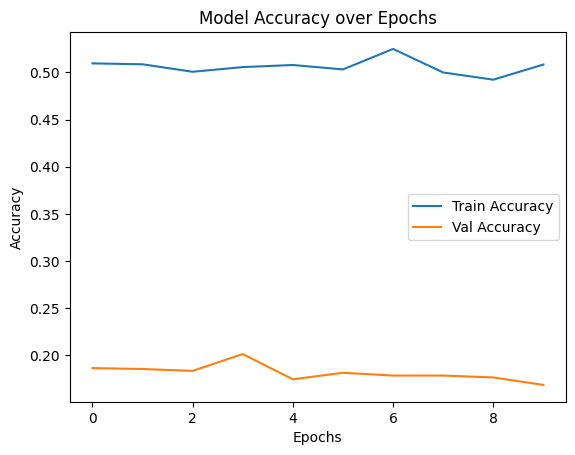

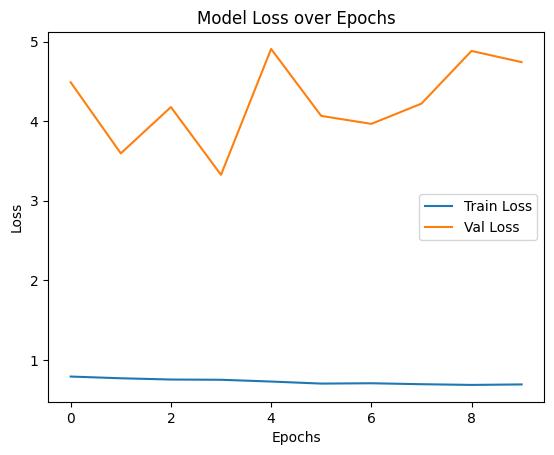

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
print(train_generator.class_indices)

{'Garbage classification': 0, 'cardboard': 1, 'glass': 2, 'metal': 3, 'paper': 4, 'plastic': 5, 'trash': 6}


In [ ]:
train_generator = train_datagen.flow_from_directory(
    '/content/garbage_data',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

Found 2527 images belonging to 6 classes.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
print(train_generator.class_indices)

{'Garbage classification': 0, 'cardboard': 1, 'glass': 2, 'metal': 3, 'paper': 4, 'plastic': 5, 'trash': 6}


# Task
Explain the error in the selected code. If possible, fix the error and incorporate the changes into the existing code. Otherwise, try to diagnose the error.

## Move class directories

### Subtask:
Move all the class directories (cardboard, glass, etc.) from the 'Garbage classification' directory into the 'garbage_data' directory.


**Reasoning**:
List the contents of the 'Garbage classification' directory to identify the class directories.



In [ ]:
print(os.listdir('garbage_data/Garbage classification'))

['Garbage classification']


**Reasoning**:
Based on the previous output, it seems there's an extra nested directory 'Garbage classification'. I need to list the contents of this nested directory to find the actual class directories.



**Reasoning**:
List the contents of the 'Garbage classification' directory to identify the class directories.

In [ ]:
import os
print(os.listdir('garbage_data/Garbage classification'))

['Garbage classification']


**Reasoning**:
Based on the previous output, it seems there's an extra nested directory 'Garbage classification'. I need to list the contents of this nested directory to find the actual class directories.

In [ ]:
import os
print(os.listdir('garbage_data/Garbage classification/Garbage classification'))

['metal', 'glass', 'trash', 'paper', 'cardboard', 'plastic']


**Reasoning**:
Move the class directories from the nested 'Garbage classification' directory to the 'garbage_data' directory.

In [ ]:
import os
import shutil

source_dir = 'garbage_data/Garbage classification/Garbage classification'
destination_dir = 'garbage_data'

class_directories = ['metal', 'glass', 'trash', 'paper', 'cardboard', 'plastic']

for class_dir in class_directories:
    shutil.move(os.path.join(source_dir, class_dir), destination_dir)

**Reasoning**:
Remove the existing class directories in `garbage_data` before moving the correct ones to avoid the "Destination path already exists" error.

In [ ]:
import os
import shutil

destination_dir = 'garbage_data'
class_directories = ['metal', 'glass', 'trash', 'paper', 'cardboard', 'plastic']

for class_dir in class_directories:
    path_to_remove = os.path.join(destination_dir, class_dir)
    if os.path.exists(path_to_remove):
        shutil.rmtree(path_to_remove)

**Reasoning**:
Remove the empty 'Garbage classification' directory.

In [ ]:
import os
import shutil

directory_to_remove = 'garbage_data/Garbage classification'

if os.path.exists(directory_to_remove):
    shutil.rmtree(directory_to_remove)

In [ ]:
print(train_generator.class_indices)

{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted class: cardboard


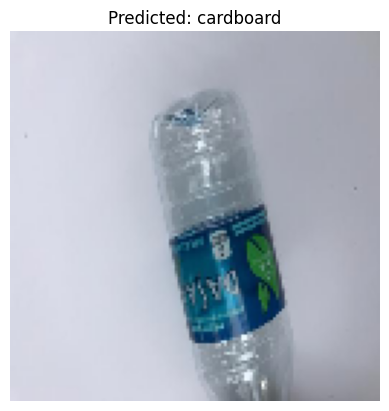

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load and preprocess an image
img_path = '/content/garbage_data/plastic/plastic100.jpg'
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)

# Get class names
class_labels = list(train_generator.class_indices.keys())
print("Predicted class:", class_labels[predicted_class])

# Optional: Display the image
plt.imshow(img)
plt.title(f"Predicted: {class_labels[predicted_class]}")
plt.axis('off')
plt.show()

In [ ]:
model.save("basic_garbage_classifier.keras")